# PA ST 810: Convolutional Neural Network
## Homework 2: Convolutional Neural Network

**GEC**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 100

<hr style="height:2.4pt">

### INSTRUCTIONS


- This homework is a jupyter notebook. Download and work on it on your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropraite plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

### Names of the people who worked on this homework together
#### /name here/

<table border=0 cellpadding=0 cellspacing=0 width=556 style='border-collapse:
 collapse;table-layout:fixed;width:416pt'>
 <col width=72 style='mso-width-source:userset;mso-width-alt:2560;width:54pt'>
 <col width=146 style='mso-width-source:userset;mso-width-alt:5176;width:109pt'>
 <col width=338 style='mso-width-source:userset;mso-width-alt:12003;width:253pt'>
 <tr height=23 style='height:17.4pt'>
  <td height=23 class=xl65 width=72 style='height:17.4pt;width:54pt'>Part</td>
  <td class=xl65 width=146 style='border-left:none;width:109pt'>Name</td>
  <td class=xl65 width=338 style='border-left:none;width:253pt'>Work</td>
 </tr>
 <tr height=23 style='height:17.4pt'>
  <td rowspan=2 height=46 class=xl65 style='height:34.8pt;border-top:none'>Part1</td>
  <td class=xl66 style='border-top:none;border-left:none'>Hansheng Li</td>
  <td class=xl66 style='border-top:none;border-left:none'>Make part1 work and
  improve.<span style='mso-spacerun:yes'>&nbsp; </span>Integrate.<span
  style='mso-spacerun:yes'>&nbsp;</span></td>
 </tr>
 <tr height=23 style='height:17.4pt'>
  <td height=23 class=xl66 style='height:17.4pt;border-top:none;border-left:
  none'>Yuhui Wu</td>
  <td class=xl66 style='border-top:none;border-left:none'>Optimize the layout,
  add some comments</td>
 </tr>
 <tr height=23 style='height:17.4pt'>
  <td rowspan=2 height=46 class=xl65 style='height:34.8pt;border-top:none'>Part2</td>
  <td class=xl66 style='border-top:none;border-left:none'>Zheng Robert Jia</td>
  <td class=xl66 style='border-top:none;border-left:none'>Make part2 work and
  improve.</td>
 </tr>
 <tr height=23 style='height:17.4pt'>
  <td height=23 class=xl66 style='height:17.4pt;border-top:none;border-left:
  none'>Zijian Wang</td>
  <td class=xl66 style='border-top:none;border-left:none'>Optimize the layout,
  add some comments</td>
 </tr>
 <![if supportMisalignedColumns]>
 <tr height=0 style='display:none'>
  <td width=72 style='width:54pt'></td>
  <td width=146 style='width:109pt'></td>
  <td width=338 style='width:253pt'></td>
 </tr>
 <![endif]>
</table>

In [1]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()

# Uncomment the line below to help debug if the path to included images don't show
#print(working_dir)
os.chdir(working_dir)

In [ ]:
# Please download the 2.1.0 version of tensorflow for this homework and also tf_keras_vis
!pip3 -qq install tf_keras_vis 
!pip -qq install tensorflow==2.1.0

In [ ]:
!pip -qq install tensorflow-addons==0.8.3

In [ ]:
!pip install -U numpy==1.18.5

In [ ]:
# !!!!!Restart runtime!!!!!
# !!!!!Restart runtime!!!!!
# !!!!!Restart runtime!!!!!

In [1]:
import math
import random 
import os
import requests
import zipfile
import shutil
import json
import time
import sys
import cv2
import numpy as np
import pandas as pd
from glob import glob
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
# run the below cell to check if you have the correct version

print(tf.__version__)

2.1.0


In [3]:
# Enable/Disable Eager Execution
# Reference: https://www.tensorflow.org/guide/eager
# TensorFlow's eager execution is an imperative programming environment that evaluates operations immediately, 
# without building graphs

#tf.compat.v1.disable_eager_execution()
#tf.compat.v1.enable_eager_execution()

print("tensorflow version", tf.__version__)
print("keras version", tf.keras.__version__)
print("Eager Execution Enabled:", tf.executing_eagerly())

# Get the number of replicas 
strategy = tf.distribute.MirroredStrategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

devices = tf.config.experimental.get_visible_devices()
print("Devices:", devices)
print(tf.config.experimental.list_logical_devices('GPU'))

print("GPU Available: ", tf.config.list_physical_devices('GPU'))
print("All Pysical Devices", tf.config.list_physical_devices())

# Better performance with the tf.data API
# Reference: https://www.tensorflow.org/guide/datac_performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(2266)

tensorflow version 2.1.0
keras version 2.2.4-tf
Eager Execution Enabled: True
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of replicas: 1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
All Pysical Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import certifi
import urllib3  # For handling https certificate verification 
import scipy.ndimage as ndimage
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import os

In [5]:
import numpy as np

from PIL import Image

from matplotlib import pyplot
import matplotlib.pylab as plt 
from scipy.signal import convolve2d
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import activations
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

#Some imports for getting the CIFAR-10 dataset and for help with visualization*]
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore

import tensorflow_addons as tfa

import os
import certifi
import urllib3  # For handling https certificate verification 
import scipy.ndimage as ndimage
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

## Please download the packages that are missing in your colab environment


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h1> Overview </h1> 

<br />

In this homework, we will explore Convolutional Neural Networks (CNNs).  We will begin by building a CNN to classify CIFAR-10 images, a standard pedagogical problem, and use saliency maps to understand what the network is paying attention to. We will then see that CNNs aren't just for classifying. They can serve as image input processing for a variety of tasks, as we will show by training a network to rotate faces upright.


<h2> Part 1: Building a Basic CNN Model [50pts total] </h2>
<br />

In this question, you will use Keras to create a convolutional neural network for predicting the type of object shown in images from the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 classes.

<br /><br />

<h4> Loading CIFAR-10 and Constructing the Model. </h4>
<br />

Load CIFAR-10 and use a combination of the following layers: Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order, and you can use as many layers as you'd like) to build your classification model. You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should construct the network yourself and not use a pre-written implementation. At least one of your Conv2D layers should have at least 9 filters to be able to do question 1.3.
<br /><br />

Convolutional neural networks are computationally intensive. We highly recommend that you train your model on a system using GPUs (take a look at Google Colab's runtime settings for accessing a GPU environment free of cost). On CPUs, this training can take over an hour. On GPUs, it can be done within minutes. If you become frustrated having to rerun your model every time you open your notebook, take a look at how to save your model weights as explicitly detailed in **Part 2**, where it is required to save your weights.
<br /><br />

You can approach the problems in this question by first creating a model assigning 32 filters to each Conv2D layer recreate the model with 64 filters/layer, 128, etc. For each generated model, keep track of the total number of parameters.
<br /><br />

**1.1** [16pts] Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship?
<br /><br />

**1.2** [20pts total] Choose a model, train and evaluate it.
<br /><br />

 **1.2.1** [15pts] Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes. 
 <br /><br />
 
**1.2.2** [5pts] Plot the loss and accuracy (both train and test) for your chosen architecture.
 <br /><br />
 
*Techniques to Visualize the Model.*
 <br /><br />
 
We will gain an intuition into how our model is processing the inputs in two ways.  First we'll ask you to use feature maps to visualize the activations in the intermediate layers of the network. We've provided a helper function `get_feature_maps` to aid in extracting feature maps from layer outputs in your model network.  Feel free to take advantage of it if you'd like.  We'll also ask you to use [saliency maps](https://arxiv.org/abs/1312.6034) to visualize the pixels that have the largest impact on the classification of an input (image in this case), as well as a more recent development,[Grad-CAM](https://arxiv.org/abs/1610.02391), which has been shown to better indicate the attention of CNNs.
 <br /><br />
 
**1.3** [14pts] For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from any intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.
 <br /> <br />



**1.4** [10pts] For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?
 <br /><br />
 
**1.5** [14pts] Repeat `1.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?

</div>




### 1.1


**1.1 [16pts]** Report the total number of parameters in your model. How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases (your model should have at least 2 Conv layers)? You can find this empirically by constructing multiple models with the same type of architecture, increasing the number of filters. Generate a plot showing the relationship and explain why it has this relationship.

In [6]:
# DenseNet18
# https://d2l.ai/chapter_convolutional-modern/densenet.html

# BN->act->conv2d
class BN_ReLU_Conv(tf.keras.layers.Layer):
  def __init__(self, num_filters):
    super(BN_ReLU_Conv, self).__init__()
    self.bn = tf.keras.layers.BatchNormalization()
    self.relu = tf.keras.layers.ReLU()
    self.conv = Conv2D(num_filters, 3, padding='same')
    self.listLayers = [self.bn, self.relu, self.conv]

  def call(self, X):
    Y = X
    for layer in self.listLayers.layers:
        Y = layer(Y)
    return tf.keras.layers.concatenate([X,Y], axis=-1)

# Connecting inputs and outputs in the channel dimension
class DenseBlock(tf.keras.layers.Layer):
  def __init__(self, num_layers, num_growth_channels):
    super(DenseBlock, self).__init__()
    self.listLayers = []
    for _ in range(num_layers):
      layer = BN_ReLU_Conv(num_growth_channels)
      self.listLayers.append(layer)
  
  def call(self, X):
    for layer in self.listLayers.layers:
      X = layer(X)
    return X

# 1x1Conv, avgPooling strides=2
class transition_block(tf.keras.layers.Layer):
  def __init__(self, num_filters):
    super(transition_block, self).__init__()
    self.bn = tf.keras.layers.BatchNormalization()
    self.relu = tf.keras.layers.ReLU()
    self.conv = Conv2D(num_filters, kernel_size=1)
    self.avg_pool = tf.keras.layers.AveragePooling2D(pool_size=2, strides=2)
    
  def call(self, X):
    X = self.bn(X)
    X = self.relu(X)
    X = self.conv(X)
    return self.avg_pool(X)

# Build the DenseNet18
class DenseNet18(tf.keras.Model):
  def __init__(self, growth_rate=32, num_convs_in_dense_blocks=[4,4,4,4], num_classes=10):
    super(DenseNet18, self).__init__()
    # input encoder
    num_channels=64
    self.block1 = Sequential([
      Conv2D(num_channels, 7, strides=2, padding='same'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ReLU(),
      tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')
    ])
    
    # densen block and transition block
    self.db1 = DenseBlock(4, growth_rate)
    num_channels += 4 * growth_rate
    self.t1 = transition_block(num_channels // 2)
    num_channels = num_channels // 2
    self.db2 = DenseBlock(4, growth_rate)
    num_channels += 4 * growth_rate
    self.t2 = transition_block(num_channels // 2)
    num_channels = num_channels // 2
    self.db3 = DenseBlock(4, growth_rate)
    num_channels += 4 * growth_rate
    self.t3 = transition_block(num_channels // 2)
    num_channels = num_channels // 2
    self.db4 = DenseBlock(4, growth_rate)
    
    # GAP and classification
    self.block3 = Sequential()
    self.block3.add(tf.keras.layers.BatchNormalization())
    self.block3.add(tf.keras.layers.ReLU())
    self.block3.add(tf.keras.layers.GlobalAveragePooling2D())
    self.block3.add(Flatten())
    self.block3.add(Dense(10))
    self.block3.add(tf.keras.layers.Softmax())

  # to fix the "bug"
  # MUST CALL THIS ONCE
  # https://stackoverflow.com/questions/55235212/model-summary-cant-print-output-shape-while-using-subclass-model
  def summary_model(self):
    inputs = tf.keras.Input(shape=(96, 96, 3))
    outputs = self.call(inputs)
    tf.keras.Model(inputs=inputs, outputs=outputs, name="thing").summary()

  def call(self, X):
    X = self.block1(X)
    X = self.db1(X)
    X = self.t1(X)
    X = self.db2(X)
    X = self.t2(X)
    X = self.db3(X)
    X = self.t3(X)
    X = self.db4(X)
    X = self.block3(X)
    return X

Text(0.5, 1.0, 'Relationship Between Filters and Parameters')

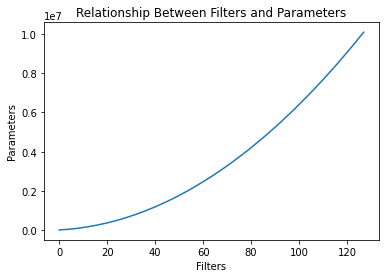

In [7]:
# plot relationship between the number of filters per layer 
# and the number of total parameters
growth_rate_VS_params=[]
for i in range(1,129):
  model = DenseNet18(growth_rate=i)
  model(tf.random.uniform((4, 96, 96, 3)))
  growth_rate_VS_params.append(model.count_params())
plt.plot(growth_rate_VS_params)
plt.xlabel('Filters')
plt.ylabel('Parameters')
plt.title('Relationship Between Filters and Parameters')


**Explanation**  
As the number of filters per layer increases, the number of total parameters increases **exponentially**.
Since the parameters of each Conv layer equals to [**FANout** * (kernelW * kernelH * **FANin** + 1)]. So, filters\*2 -> parameters\*4.  
Notice that some parts parameters are not affected by the number of filters.

### 1.2

**1.2 Choosing a Model, Training and Evaluating It. [20pts total]**


 **[15pts]** Take your model from above and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes.
 
 **[5pts]** Plot the loss and accuracy (both train and test) for your chosen architecture.

In [ ]:
# It looks like the tf2.1 API is really chaotic!
# Many problems were encountered......

170500096/170498071 [==============================] - 3s 0us/step
Train data samples: 50000
Test data samples: 10000


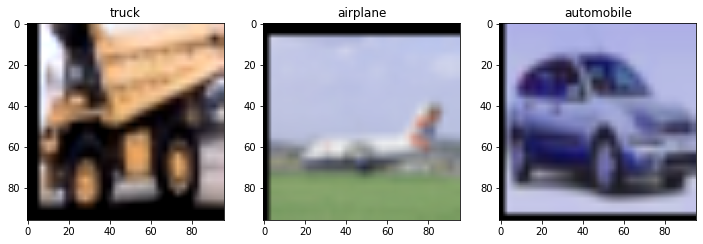

In [ ]:
image_size = 32
batch_size = 512

# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# label to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(f"Train data samples: {len(x_train)}")
print(f"Test data samples: {len(x_test)}")

# # RandomRotation(GIVE UP)
# def rand_degree(num):
#   upper = num * (math.pi/180.0) # degrees -> radian
#   lower = -num * (math.pi/180.0)
#   return random.uniform( lower , upper )
# def RandomRotation(img, num):
#   img = tfa.image.rotate(img, rand_degree(num))
#   # output img is a Tensor
#   return img

def colorJitter(image):
  image = tf.image.random_brightness(image, max_delta=0.125)
  image = tf.image.random_contrast(image, 0.6, 1.4)
  image = tf.image.random_saturation(image, 0.6, 1.4)
  image = tf.image.random_hue(image, max_delta=0.08)
  return image

def img_aug(inputs, label):
  if inputs.dtype != tf.float32:
    inputs = tf.image.convert_image_dtype(inputs, dtype=tf.float32)
  # color jitter
  inputs = colorJitter(inputs)
  # # RandomRotation(GIVE UP. Try two methods, meet two tf bugs!!!!!!!!!!! )
  # # https://stackoverflow.com/questions/70810550/using-tensorflow-random-rotation-and-cropping-sequentially-throws-errors
  # inputs = tf.keras.preprocessing.image.random_rotation(inputs, 10, row_axis=0, col_axis=1, channel_axis=2)
  # # https://stackoverflow.com/questions/66373169/tensorflow-2-object-detection-api-numpy-version-errors/66486051#66486051
  # inputs = RandomRotation(inputs, 10)
  # RandomCrop
  inputs = tf.image.pad_to_bounding_box(inputs, 2, 2, 36, 36)
  inputs = tf.image.random_crop(inputs, [32,32,3])
  # RandomHorizontalFlip
  inputs = tf.image.random_flip_left_right(inputs)
  # ToTensor
  inputs /= 255
  # Normalize(std)(GIVE UP)
  # RandomErasing(GIVE UP)
  # Resize
  inputs = tf.image.resize(inputs, [96,96])
  return inputs, label

def img_trans(inputs, label):
  if inputs.dtype != tf.float32:
    inputs = tf.image.convert_image_dtype(inputs, dtype=tf.float32)
  # ToTensor
  inputs /= 255
  # Normalize(GIVE UP)
  # resize
  inputs = tf.image.resize(inputs, [96,96])
  return inputs, label

# preprocessing and make datasets
def make_datasets(images, labels, is_train=False):
  dataset = tf.data.Dataset.from_tensor_slices((images, labels))
  if is_train:
    dataset = dataset.shuffle(batch_size * 10)
    dataset = dataset.map(img_aug, num_parallel_calls=AUTOTUNE)
  else:
    dataset = dataset.map(img_trans, num_parallel_calls=AUTOTUNE)
  return dataset

# preprocessing
train_dataset    = make_datasets(x_train, y_train, is_train=True)
test_dataset    = make_datasets(x_test, y_test)
train_dataset_batch = train_dataset.batch(batch_size).prefetch(AUTOTUNE)
test_dataset_batch = test_dataset.batch(batch_size).prefetch(AUTOTUNE)

# Have a look on the augmented train datasets
i = 0
fig, axes = plt.subplots(1, 3, figsize=(12,4))
cifar10dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}
for (image, label) in train_dataset.take(3):
  axes[i].imshow(image)
  axes[i].set_title(cifar10dict[np.argmax(label)])
  i += 1

In [ ]:
# your code here
# Choose model
Cifar10_model = DenseNet18(growth_rate=32)
Cifar10_model.summary_model()

Model: "thing"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 24, 24, 64)        9728      
_________________________________________________________________
dense_block (DenseBlock)     (None, 24, 24, 192)       130944    
_________________________________________________________________
transition_block (transition (None, 12, 12, 96)        19296     
_________________________________________________________________
dense_block_1 (DenseBlock)   (None, 12, 12, 224)       168320    
_________________________________________________________________
transition_block_1 (transiti (None, 6, 6, 112)         26096     
_________________________________________________________________
dense_block_2 (DenseBlock)   (None, 6, 6, 240)         187008

In [ ]:
# compile model
Cifar10_model.compile(optimizer=Adam(learning_rate=1e-3, amsgrad=True), loss='categorical_crossentropy', metrics=['accuracy', 'CategoricalCrossentropy'])
# Train
cifar10_history = Cifar10_model.fit(train_dataset_batch, validation_data=test_dataset_batch, epochs=75, verbose=0)

In [ ]:
# evaluate model
Cifar10_model_acc = Cifar10_model.evaluate(test_dataset_batch, verbose=0)[1]
print(f'The accuracy of Cifar10 model on test dataset is {Cifar10_model_acc:.4f}')

The accuracy of Cifar10 model on test dataset is 0.8440


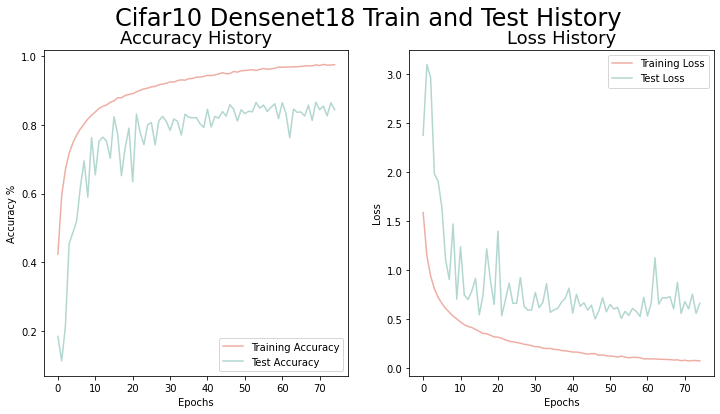

In [ ]:
# Plot the loss and accuracy function
def plot_history(history):
  fig, ax = plt.subplots(1,2,figsize = (12,6))
  # acc
  ax[0].plot(history.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
  ax[0].plot(history.history['val_accuracy'],color='#B2D7D0',label = 'Test Accuracy')
  ax[0].legend()
  ax[0].set_xlabel('Epochs');
  ax[0].set_ylabel('Accuracy %');
  ax[0].set_title('Accuracy History', fontsize=18)
  # Loss
  ax[1].plot(history.history['CategoricalCrossentropy'],color='#EFAEA4',label = 'Training Loss')
  ax[1].plot(history.history['val_CategoricalCrossentropy'],color='#B2D7D0',label = 'Test Loss')
  ax[1].legend()
  ax[1].set_xlabel('Epochs');
  ax[1].set_ylabel('Loss');
  ax[1].set_title('Loss History', fontsize=18)

  fig.suptitle('Cifar10 Densenet18 Train and Test History', fontsize=24)

# Plot the loss and accuracy (both train and test) for your chosen architecture
plot_history(cifar10_history)

In [ ]:
# # Load drive to save weights
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # Save Weights
# # https://cloud.tencent.com/developer/article/1718049
# # https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb#scrollTo=S_FA-ZvxuXQV
# Cifar10_model.save_weights('/content/drive/MyDrive/Colab Notebooks/Pavlos_Protopapas_Intro_to_Neural_Networks/HW2/Q1weights/weight')

In [ ]:
# # Load Weights
# Cifar10_model = DenseNet18(growth_rate=32)
# Cifar10_model.load_weights('/content/drive/MyDrive/Colab Notebooks/Pavlos_Protopapas_Intro_to_Neural_Networks/HW2/Q1weights/weight')
# Cifar10_model.summary_model()
# Cifar10_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'CategoricalCrossentropy'])
# new_model_acc = Cifar10_model.evaluate(test_dataset_batch,verbose=0)[1]
# print(f'The accuracy of load model on test dataset is {new_model_acc:.4f}')

### 1.3


**1.3 [14pts]** For a given input image from the test set that is correctly classified, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid (use `imshow`'s `cmap='gray'` to show the feature maps in black & white).  Make sure to plot (and clearly label) your original input image as well. You may use the provided `get_feature_maps` function and the `cifar10dict` dictionary to convert class index to the correct class name.

**Helper code to generate feature maps**

In [ ]:
def get_feature_maps(model, layer_id, input_image):
    """Returns intermediate output (activation map) from passing an image to the model
    
    Parameters:
        model (tf.keras.Model): Model to examine
        layer_id (int): Which layer's (from zero) output to return
        input_image (ndarray): The input image
    Returns:
        maps (List[ndarray]): Feature map stack output by the specified layer
    """
    # 
    # model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    model_ = Model(inputs=[model.layers[0].input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

**A dictionary to turn class index into class labels for CIFAR-10**

In [ ]:
cifar10dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

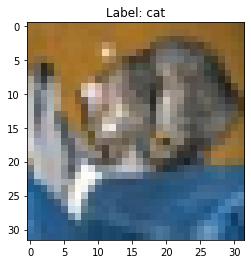

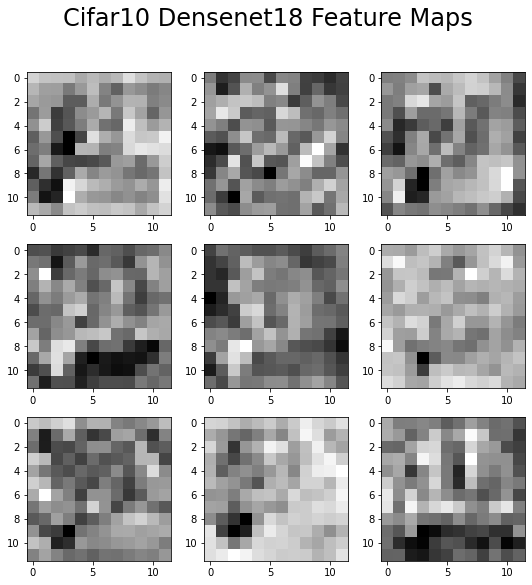

In [ ]:
# your code here
def PlotFeatureMap4Correct(model, layer_num):
  predict_y = model.predict(test_dataset_batch)
  predict_label = np.argmax(predict_y, axis=1)
  true_label = np.argmax(y_test, axis=1)
  predict_CorrectOrNot = pd.DataFrame(predict_label==true_label)
  first_correct_index = int(predict_CorrectOrNot.eq(True).idxmax())

  plt.imshow(x_test[first_correct_index]/255)
  plt.title('Label: '+cifar10dict[true_label[first_correct_index]])
  plt.show()

  # 
  # https://github.com/keras-team/keras/issues/13782
  # https://github.com/tensorflow/tensorflow/issues/34454
  # https://stackoverflow.com/questions/65365745/model-summary-output-is-not-consistent-with-model-definition
  # https://stackoverflow.com/questions/55235212/model-summary-cant-print-output-shape-while-using-subclass-model
  feature_maps = get_feature_maps(model, layer_num, tf.image.resize(x_test[first_correct_index]/255, [96,96]))[0:9]
  fig, ax = plt.subplots(3,3, figsize=(9,9))
  for i, feature_map in enumerate(feature_maps):
    ax.ravel()[i].imshow(feature_map, cmap="gray")
  fig.suptitle('Cifar10 Densenet18 Feature Maps', fontsize=24)

PlotFeatureMap4Correct(Cifar10_model, 3)

**1.4 [10pts]** For the same input image generate and plot a (SmoothGrad) saliency map to show the pixels in the image most pertinent to classification, and a Grad-CAM heatmap. This is most easily done with the [tf-keras-vis](https://pypi.org/project/tf-keras-vis/) package. Take a look at the "Usage" examples; it will be straightforward to apply to our model. Feel free to pick your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html); the `jet` colormap is harder to interpret than sequential ones. Arrange the three plots in a row using subplots: Original Image, Saliency Map, GradCAM. Which visualization is easier to understand in your case, and what does the network seem to be focusing on?

In [ ]:
# prepare data we need
predict_y = Cifar10_model.predict(test_dataset_batch)
predict_label = np.argmax(predict_y, axis=1)
true_label = np.argmax(y_test, axis=1)
predict_CorrectOrNot = pd.DataFrame(predict_label==true_label)

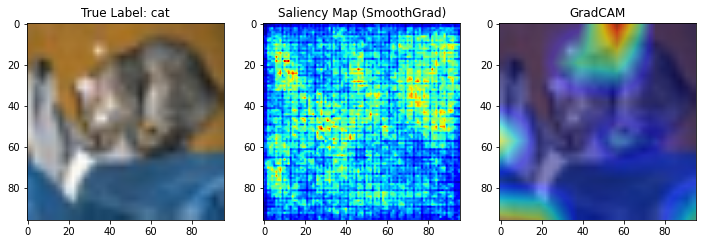

In [ ]:
# first correctly classified
first_correct_index = int(predict_CorrectOrNot.eq(True).idxmax())

# remove the last softmax activation
def model_modifier_function(model):
  # a little differences due to i use block to define the model
  model_ = Model(inputs=[model.layers[0].input], outputs=[model.layers[-1].layers[-2].output])
  return model_
# generate two model
Cifar10_linear = model_modifier_function(Cifar10_model)
gradcam_model = Model(inputs = [Cifar10_linear.inputs], outputs = [Cifar10_linear.layers[-7].conv.output])
# get a image
img = tf.image.resize(x_test[first_correct_index]/255, [96,96])
# Score(loss)
score = CategoricalScore([predict_label[first_correct_index]])

# Create Saliency object.
saliency = Saliency(Cifar10_linear)
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score,
            img,
            smooth_samples=20, # The number of calculating gradients iterations.
            smooth_noise=0.20) # noise spread level.

# Create Gradcam object
gradcam = Gradcam(gradcam_model)
# Generate heatmap with GradCAM
cam = gradcam(score,
        img,
        penultimate_layer=-1)


fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(img)
axes[0].set_title('True Label: '+cifar10dict[true_label[first_correct_index]])
axes[1].imshow(saliency_map[0], cmap='jet')
axes[1].set_title('Saliency Map (SmoothGrad)')
axes[2].imshow(img)
axes[2].imshow(np.uint8(cm.jet(cam[0])[...,:3] * 255), cmap='jet', alpha=0.5) # overlay
axes[2].set_title('GradCAM')
fig.show()

**ANSWER**  
It is clear that GradCAM is easier to understand in this case.  
The model looks more focused on the back and ears of the cat.  

**1.5 [14pts]** Repeat `1.4` for an image from the test set that is *incorrectly classified*, indicating both the incorrect label and what the correct label should be, and from the visualizations of network attention, hypothesize why the network arrived at its answer. (Make sure you pass a new loss to the visualizers that uses the *incorrect* class index, because we want to see what caused the network to think the image was in that category!) If you had control over what images go in the training dataset, how could you modify it to avoid this particular network failure?


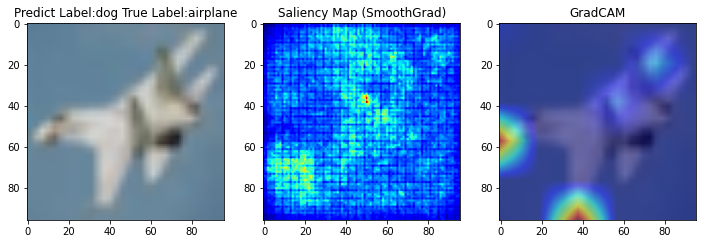

In [ ]:
# first incorrectly classified
first_wrong_index = int(predict_CorrectOrNot.eq(False).idxmax())

# remove the last softmax activation
def model_modifier_function(model):
  # a little differences due to i use block to define the model
  model_ = Model(inputs=[model.layers[0].input], outputs=[model.layers[-1].layers[-2].output])
  return model_
# generate two model
Cifar10_linear = model_modifier_function(Cifar10_model)
gradcam_model = Model(inputs = [Cifar10_linear.inputs], outputs = [Cifar10_linear.layers[-7].conv.output])
# get a image
img = tf.image.resize(x_test[first_wrong_index]/255, [96,96])
# Score(loss) uses the incorrect class index!
score = CategoricalScore([predict_label[first_wrong_index]])

# Create Saliency object.
saliency = Saliency(Cifar10_linear)
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score,
            img,
            smooth_samples=20, # The number of calculating gradients iterations.
            smooth_noise=0.20) # noise spread level.

# Create Gradcam object
gradcam = Gradcam(gradcam_model)
# Generate heatmap with GradCAM
cam = gradcam(score,
        img,
        penultimate_layer=-1)


fig, axes = plt.subplots(1,3, figsize=(12,4))
axes[0].imshow(img)
axes[0].set_title('Predict Label:'+cifar10dict[predict_label[first_wrong_index]]+
            ' True Label:'+cifar10dict[true_label[first_wrong_index]])
axes[1].imshow(saliency_map[0], cmap='jet')
axes[1].set_title('Saliency Map (SmoothGrad)')
axes[2].imshow(img)
axes[2].imshow(np.uint8(cm.jet(cam[0])[...,:3] * 255), cmap='jet', alpha=0.5) # overlay
axes[2].set_title('GradCAM')
fig.show()

**ANSWER**  
The model maybe take the pointy part as the ear, this could explain why jet are predicted to be dog. Therefore, we can use **random erasing** during the data augmentation. This can alleviate the model's over-reliance on certain features.  
(I tried random erasing in another framework and have a real performance improvement. However, I have encountered too many bugs so far, and according to "If it ain't broken, don't fix it.", I decided to give up adding it this time.)   
  

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
<h2> Part 2: Regression with CNN [50 pts total] </h2>

## Problem Statement

In this problem we will construct a neural network to predict *how far a face is from being "upright"*. 

Image orientation estimation with convolutional networks was first implemented in 2015 by Fischer, Dosovitskiy, and Brox in a paper titled ["Image Orientation Estimation with Convolutional Networks"](https://lmb.informatik.uni-freiburg.de/Publications/2015/FDB15/image_orientation.pdf), where the authors trained a network to straighten a wide variety of images using the Microsoft COCO dataset. 

In order to have a reasonable training time for a homework, we will be working on a subset of the problem where we just straighten images of faces. To do this, we will be using the [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset of celebrity faces, where we assume that professional photographers have taken level pictures. 

The training will be supervised, with a rotated image (up to $\pm 60^\circ$) as an input, and the amount (in degrees) that the image has been rotated as a target. 
    
</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
<h2> Questions </h2>

### Data preparation [20 points]

**2.1.1[10 points]** **Loading CelebA and Thinking about Datasets**.

Run the cells provided to automatically download the CelebA dataset. It is about 1.3GB, which can take 10-20 minutes to download. This happens only once; in the future when you rerun the cell, it will use the dataset stored on your google drive.

**NOTE**: If you get a `NonMatchingChecksumError`, note that this is a documented issue and is because of multiple server requests. Refer [here](https://github.com/tensorflow/datasets/issues/1482) for more details.

The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. 

[TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from part 1 where the entire dataset was loaded in as an array. 

Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). 

Explain in less than 150 words why using this approach is advantageous over loading the entire data in one array.

   
**2.1.2[5 points]** **Taking a look**.

In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits. 

Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

**2.1.3[5 points]** **Conceptual Question**

Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. 

Write in **3-5 sentences** if it is a good idea to use dropout layers? 

Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.

### Building and training your CNN [25 points]

**2.2.1[5 points]** **Compiling your model**.

Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.

**2.2.2[10 points]** **Training your model**.

Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

**2.2.3[10 points]** **Evaluating your model**.

Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:

This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.

### Further Analysis [5 points]

**2.3.1[5 points]** **Correct an image of your choosing**.

Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it.
    
</div>

**2.1.1** **Loading CelebA and Thinking about Datasets**.

Run the cells provided to automatically download and load the CelebA dataset. It is about 1.3GB, and may take some time to download. Please ensure you are running the `2.1.0` version of tensorflow.

The creation of the normalization/rotation/resize pipeline has been done for you, resulting in train dataset `train_rot_ds` and test dataset `test_rot_ds`. 

[TensorFlow Datasets](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) are objects that behave like Python generators, allowing you to take elements (either input/target tuples or feature dictionaries) until you have gone through the entire dataset. Note how this is different from part 1 where the entire dataset was loaded in as an array. 

Datasets also allow you to pipeline transformations to be applied to the elements, resulting in a new transformed Dataset (like `train_rot_ds`). 

In [ ]:
#mount your own drive to avoid downloading the data multiple time 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Following creates a directory, downloads the file and unzips it. 

if os.path.isdir('gdrive/My Drive/celeb_a/2.0.1'):
    print('Found dataset' )
else:
    os.makedirs('gdrive/My Drive/celeb_a')
    !gdown -qq https://drive.google.com/u/2/uc?id=1CdfrT4f87b8ggx02TxsBuMTu0bqSIpNX&export=download
    !unzip 2.0.1.zip  -d gdrive/My\ Drive/celeb_a/

Found dataset


In [ ]:
# This command will use the celeb_a dataset that you downloaded, and load it into train and test 'tensorflow.Datasets'

train_celeb, test_celeb = tfds.load('celeb_a', split=['train', 'test'], shuffle_files=False, data_dir = 'gdrive/My Drive/', download=False)

In [ ]:
# You may use the following two functions
def normalize_image(img):
    return tf.cast(img, tf.float32)/255.

def rot_resize(img, deg):
    rotimg = ndimage.rotate(img, deg, reshape=False, order=3)
    rotimg = np.clip(rotimg, 0., 1.)
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

################################################################
# Don't manually invoke these functions; they are for Dataset 
# pipelining that is already done for you.
################################################################
def tf_rot_resize(img, deg):
    """Dataset pipe that rotates an image and resizes it to 140x120"""
    rotimg = tfa.image.rotate(img, deg/180.*np.pi, interpolation="BILINEAR")
    rotimg = tf.image.resize_with_crop_or_pad(rotimg,140,120)
    return rotimg

def tf_random_rotate_helper(image):
    """Dataset pipe that normalizes image to [0.,1.] and rotates by a random
    amount of degrees in [-60.,60.], returning an (input,target) pair consisting
    of the rotated and resized image and the degrees it has been rotated by."""
    image = normalize_image(image)
    deg = tf.random.uniform([],-60.,60.)
    return (tf_rot_resize(image,deg), deg)  # (data, label)

def tf_random_rotate_image(element):
    """Given an element drawn from the CelebA dataset, this returns a rotated
    image and the amount it has been rotated by, in degrees."""
    image = element['image']
    image, label = tf_random_rotate_helper(image)
    image.set_shape((140,120,3))
    return image, label
################################################################

In [ ]:
# Pipeline for creating randomly rotated images with their target labels being 
# the amount they were rotated, in degrees.
train_rot_ds = train_celeb.map(tf_random_rotate_image, num_parallel_calls=AUTOTUNE)
test_rot_ds = test_celeb.map(tf_random_rotate_image, num_parallel_calls=AUTOTUNE)

**Your answer here**  
Explain in less than 150 words why using this approach is advantageous over loading the entire data in one array: 

**ANS:**  
**The generated dataset is huge. Loading them to one array is time consuming. Instead, using piplining in tf.data saves memory. In addition, it makes it easier and more efficient for us to make transformations to the inputs, in this case rotating the images.**

**Besides, since I'm using GPU, it prevents GPU from facing data starvation**

**2.1.2** **Taking a look**.

In a grid of subplots, plot at least 4 rotated images from `train_rot_ds` with the titles being the amount the images have been rotated. The floating point numbers in the titles should have a reasonable number of digits. 

Hint: one way to get a few image+label tuples from the Dataset is with `train_rot_ds.take(4)`. Check the [TensorFlow Datasets documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) for more.

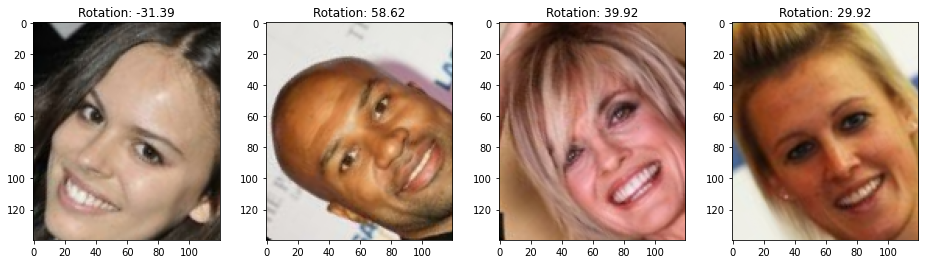

In [ ]:
# your code here
# Plot 4 images
fig, ax = plt.subplots(1,4,figsize=(16,4))
i = 0
for (image,label) in train_rot_ds.take(4):
  ax[i].imshow(image)
  ax[i].set_title(f'Rotation: {label:.2f}')
  i+=1

**2.1.3** **Conceptual Question**

Dropout layers have been shown to work well for regularizing deep neural networks, and can be used for very little computational cost. 

Write in **3-5 sentences** if it is a good idea to use dropout layers? 

Explain, being sure to explicitly discuss how a dropout layer works, and what that would mean for our model.

**Your answer here**  

The dropout work by applying a random mask onto all the neurons, making some of them connected/functioning while others not. However, for CNN layers, the mechanisms are different, despite droping out a neuron, its weight still manages to be updated in the backpropagation process. The effect of **dropout** on convolutional layers amounts to **multiplying Bernoulli noise** into the feature maps of the network.

Since we have limited input images and it's easy for the model to overfit, it would be a good idea to **use dropout layers in our Dense layer** as droptout in dense layers prevents overfitting. Nevertheless, we should **not use dropout in the CNN layers.** Batch normalization or MaxPooling are better alternertives.

**2.2.1** **Compiling your model**.

Construct a model with multiple Conv layers and any other layers you think would help. Be sure to output `<yourmodelname>.summary()` as always. Feel free to experiment with architectures and number of parameters if you wish to get better performance or better training speed. You certainly don't need more than a few million parameters; we were able to it with substantially fewer. Any working setup is acceptable though.

In [ ]:
# Finding the shape of the model
print(train_rot_ds)

<ParallelMapDataset shapes: ((140, 120, 3), ()), types: (tf.float32, tf.float32)>


In [ ]:
# your code here

model = Sequential()

# Applying BatchNorm Before Activation:
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(140,120,3),padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',use_bias=False))
model.add(BatchNormalization())
model.add(Activation(activations.relu))
model.add(MaxPooling2D(pool_size=(2,2)))

# In our several trials, 'elu' in final dense layers has outperformed 'relu'
model.add(Flatten())
model.add(Dense(32,activation='elu'))
model.add(Dropout(0.05))
model.add(Dense(16,activation='elu'))
model.add(Dense(1,activation='linear'))

# Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 140, 120, 128)     3456      
_________________________________________________________________
batch_normalization_12 (Batc (None, 140, 120, 128)     512       
_________________________________________________________________
activation_12 (Activation)   (None, 140, 120, 128)     0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 70, 60, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 70, 60, 64)        73728     
_________________________________________________________________
batch_normalization_13 (Batc (None, 70, 60, 64)        256       
_________________________________________________________________
activation_13 (Activation)   (None, 70, 60, 64)       

In [ ]:
# Compiling model
opt = Adam(learning_rate=0.001, amsgrad=True)
model.compile(optimizer=opt,loss='mse',metrics=['mse'])

**2.2.2** **Training your model**.

Train your model using `<yourmodelname>.fit()`. The syntax is a little different when working with Datasets instead of numpy arrays; take a look at the [tf.keras.Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) documentation. Be sure to also pass the test data as validation data. When passing `train_rot_ds` to `fit()`, you will find it useful to use pipelines to [batch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) the data. You can also experiment with [prefetching](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch) batches/elements from the dataset, which may allow you to speed up iterations by a few percent. Finally, while dry-running and prototyping your model, you may find it useful to [take](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) a subset of the data to speed up experimentation. Your final model should be trained on all the available training data though. You should achieve a validation loss of less than 9, corresponding to $\pm 3^\circ$ accuracy in predicting the rotations on the test set. This can be achieved in just 2-3 epochs, though you are free to train as long as you want.

In [ ]:
# your code here

# Prefetching to speed up experimentation
train_ds = train_rot_ds.batch(128).prefetch(AUTOTUNE)
val_ds = test_rot_ds.batch(128).prefetch(AUTOTUNE)
test_ds = test_rot_ds.batch(128).prefetch(AUTOTUNE)

# Trained the model with total epochs of 4
history = model.fit(train_ds,epochs=4,verbose=1,validation_data=val_ds)
# callbacks = EarlyStopping(restore_best_weights=True)
# history = model.fit(train_ds,epochs=3,verbose=1,callbacks=[callbacks],validation_data=val_ds)

Epoch 1/4
1272/1272 [==============================] - 574s 451ms/step - loss: 25.7102 - mse: 25.7105 - val_loss: 13.1353 - val_mse: 13.1351
Epoch 2/4
1272/1272 [==============================] - 574s 451ms/step - loss: 6.5332 - mse: 6.5323 - val_loss: 6.4333 - val_mse: 6.4330
Epoch 3/4
1272/1272 [==============================] - 576s 453ms/step - loss: 4.6144 - mse: 4.6128 - val_loss: 4.3505 - val_mse: 4.3504
Epoch 4/4
1272/1272 [==============================] - 574s 451ms/step - loss: 3.7856 - mse: 3.7858 - val_loss: 4.1402 - val_mse: 4.1400


In [ ]:
# # Save weights
# model.save_weights('gdrive/My Drive/checkpoint')

In [ ]:
# # Load weights
# model.load_weights('gdrive/My Drive/checkpoint')

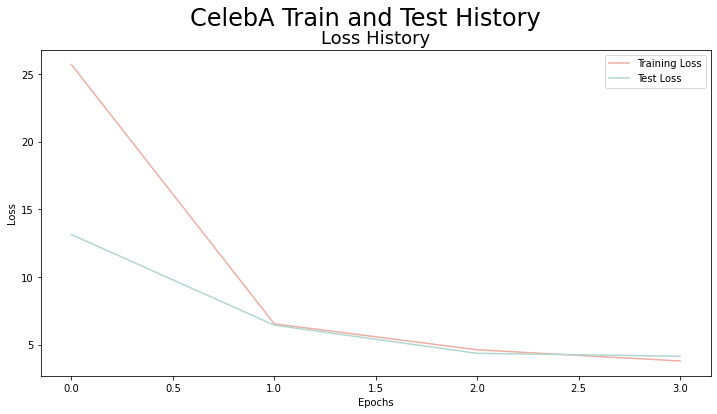

In [ ]:
# Plot the loss function
def plot_history(history):
  fig, ax = plt.subplots(1,1,figsize = (12,6))
  # Loss
  ax.plot(history.history['loss'],color='#EFAEA4',label = 'Training Loss')
  ax.plot(history.history['val_loss'],color='#B2D7D0',label = 'Test Loss')
  ax.legend()
  ax.set_xlabel('Epochs');
  ax.set_ylabel('Loss');
  ax.set_title('Loss History', fontsize=18)
  fig.suptitle('CelebA Train and Test History', fontsize=24)

# Plot the loss and accuracy (both train and test) for your chosen architecture
plot_history(history)

**2.2.3** **Evaluating your model**.

Create a subplots grid with 4 rows and 3 columns. Each row will be a separate image from the test set (of your choice) and each column will consist of: Original Image, Predicted Straightened Image, Target Straightened Image. The title of the latter two should be the predicted rotation and the actual rotation. For example, a row should look something like this:

This can be achieved using the provided function `rot_resize` to correct for the rotation predicted by your network.

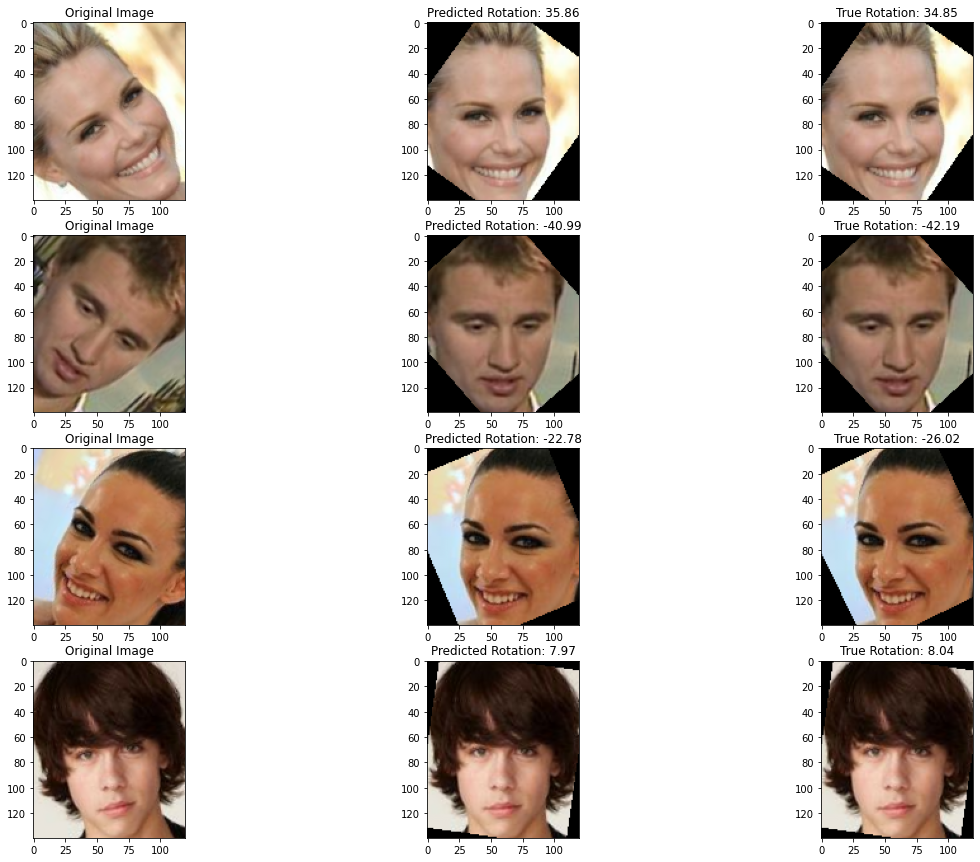

In [ ]:
# your code here

# Evaluating the model
fig, ax = plt.subplots(4,3,figsize=(20,15))
for images, labels in test_ds.take(1):
  for i in range(4):
    y_pred = model.predict(images)[i+20]
    ax[i][0].imshow(images[i+20])
    ax[i][0].set_title('Original Image')

    ax[i][1].imshow(rot_resize(images[i+20],-y_pred[0]))
    ax[i][1].set_title(f'Predicted Rotation: {y_pred[0]:.2f}')

    ax[i][2].imshow(rot_resize(images[i+20],-labels[i+20]))
    ax[i][2].set_title(f'True Rotation: {labels[i+20]:.2f}')

**2.3.1** **Correct an image of your choosing**.

Find an image or image(s) (not from the provided test/training sets), or make your own. You may rotate it yourself up to $\pm60^\circ$, or the face can already be naturally rotated. Resize and crop the image to 140px by 120px, load it here, and normalize it to [0.,1.] (you may use the provided `normalize_image` function) and use your network to correct it.

In [ ]:
# your code here

# Load image
pp1 = np.array(Image.open('/content/gdrive/MyDrive/celeb_a/pp.jpg'))
# Normalize and Resize Image. 
pp = normalize_image(pp1)
pp = tf.image.resize(pp,(140,120))

Text(0.5, 1.0, 'Predicted Rotation: -7.02')

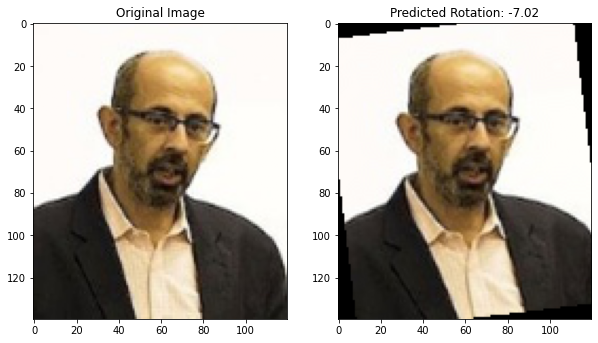

In [ ]:
# Display Image
fig, ax = plt.subplots(1,2,figsize=(10,20))
plt.imshow(pp1)

# Original Image
ax[0].imshow(pp)
ax[0].set_title('Original Image')

# Rotated image
y_pred = model.predict(np.expand_dims(pp,axis=0))
ax[1].imshow(rot_resize(pp,-y_pred[0,0]))
ax[1].set_title(f'Predicted Rotation: {y_pred[0][0]:.2f}')